# Machine Learning 4 - Evaluation and Multi-Layer Perceptron

#### By:
    1. Makos, Malgorzata Z.
    2. Mahajan, Richa

## Preparation

### Data Set Overview
In recent years machine learning has developed a number of emerging applications suitable for the life science field that deals with computational and mathematical approaches for understanding and processing data. Many times machine learning algorithms help scientists save time and money to run experiments.

We decided to use the same data as in the previous lab. The data come from the website Kaggle.com and concerns the age of the abalones. Originally the data has 9 columns and over 4177 rows.
The 9 columns describe the physical characteristics of abalones including sex, length, diameter, height, total weight, shucked weight, viscera weight, shell weight and the number of rings.
The range of the rings is 1 to 26. The age of abalone is generally calculated as the number of rings + 1.5.
The data set is initially randomly split into 80% training samples and 20% testing samples. Since this is a classification problem, the 3 classes are created that cover the range 1 to 26. We split the range of the age to form classes as 1-7 (young), 7-12 (adult), and 12-26 (old). Note that each class is a non-overlapping age range, also as presented in the pie chart below the data has more abalones in the adult class than any other.

The goal of this project is to create an effective algorithm that will classify the age range of abalones

Also, we can further develop our model to predict not just the age range but even the actual age of the abalones, which can then be used to calculate its price. This would need more data though, as we would have a class for each year corresponding to the age that needs to be predicted.

We would need a considerable amount of data for each class to get a good result from the prediction algorithm if we want to predict the actual age.

### The purpose of the Data Set
Abalone is a richly nutritious food and an excellent source of iron and pantothenic acid. Abalone widely occurs in many parts of the world in natural and farming waters. The meat of this mollusk is considered a delicacy in certain parts of Latin America (especially Chile), France, New Zealand, Southeast Asia, and East Asia (especially in China, Vietnam, Japan, and Korea). Beyond the cuisine, abalones have been a source of decoration. The shell of the abalone is used to make jewelry, because of its an iridescent swirl of intense colors, ranging from deep cobalt blue and peacock green to purples, creams, and pinks. Apart from the shells, abalones can produce pearls that are very popular in New Zealand and Australia. Abalones are generally farmed these days as their wild population has reduced greatly due to fishing and poaching. There are large abalone farms where they are raised and then sold for their meat at the appropriate time.

Abalones are costly and their value increases with their age. Depending on their age (number of rings) the price range is between 40 to 1400 dollars per kilogram.

Abalone grows by adding new layers to their shells. The age of abalone can be determined by counting the number of shell layers ("rings") present. However, this process is cumbersome and involves cutting a sample of the shell, staining it, and counting the number of rings through a microscope. This process is not a good solution for farmers who farm abalones and companies that fish for abalones in the natural waters. Because the age of abalone determines their price, the machine learning algorithm is a perfect solution to determine the age of abalones based on their physical features. This would save a lot of time which is needed to calculate their age and their prices.

These third parties like Farmers can thus know the abalone’s age and decide the selling price without complex equipment.

### Evaluation Criteria
In this project, we are focusing on a classification problem, rather than a prediction problem. We will classify the abalones into age ranges. This would be useful in determining whether they have grown fully and are ready to be sold.

Considering that getting the age of abalones based on just their physical features is pretty difficult, we would expect our algorithm to perform well on average with atleast 85% accuracy for other third parties to be interested in it. This is because the physical characteristics depend on other factors like the amount of food they are getting, the environment they live in, etc

Since the farmers would use this algorithm to predict whether the abalones are young, adult or old in order to decide whether to sell them and if it would be profitable for them, our algorithm should be able to classify correctly to give them good results.

The model would need to be deployed as the Abalone farmers would be using it to predict the age range of the abalones whenever they want.

### Data Preparation

In [1]:
import pandas as pd
import numpy as np
from scipy.special import expit
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import timeit
import csv
import warnings
warnings.filterwarnings("ignore")
from sklearn.utils import resample
from sklearn.model_selection import StratifiedKFold

In [3]:
df = pd.read_csv('abalone.csv')
df.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [4]:
df.shape

(4177, 9)

As seen above, our dataset consists of 9 variables. All the variables like sex, length, diameter, the height of the abalones, their whole weight, viscera weight, and shell weight are actually very important to determine the number of rings or age of the abalones. So we will use all these variables from our data.

In [5]:
# identify the columns with missing values
cols = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
df.fillna(0)
(df[cols].astype(np.object) == 0).any()

Sex               False
Length            False
Diameter          False
Height             True
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Rings             False
dtype: bool

In [6]:
count = 0
count = [count + 1 for x in df['Height'] if x == 0]
print(str(sum(count)))

2


In [7]:
df = df[(df[['Height']] != 0).all(axis=1)]
x = df.shape[0]
df.shape

(4175, 9)

We have checked for variables that have any values of 0. There are just 2 such entries in the variable 'Height'. We delete those entries, as deleting just 2 entries won't hurt our classification task, which makes our data consisting of 4175 rows.

In [8]:
Classes = []
target = []
for i in df.Rings:
    if i<=7:
        Classes.append('Young')
    elif i>7 and i<12:
        Classes.append('Adult')
    else:
        Classes.append('Old')

df['Classes'] = np.array(Classes)

for i in df.Classes:
    if i == 'Young':
        target.append(2)
    elif i == 'Old':
        target.append(1)
    else:
        target.append(0)

df['Target'] = np.array(target)
df.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Classes,Target
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,Old,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,Young,2
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,Adult,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,Adult,0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,Young,2
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,Adult,0
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,Old,1
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16,Old,1
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9,Adult,0
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19,Old,1


The variable 'Rings' from our dataset is actually the variable that we will be used as the label for our classification task. We have divided the dataset into three classes based on the number of Rings and created a new variable 'Classes' which we will use to store classes as young, adult, and old. We then create another variable called 'Target' to convert the classes into Integers for the purpose of using it in the model as labels.

In [9]:
tmp_df = pd.get_dummies(df.Sex,prefix='Sex')

In [10]:
if 'Sex' in df:
    del df['Sex']
df = pd.concat((tmp_df,df.iloc[:,[1,2,3,4,5,6,7,8,9]]),axis = 1)

print(df.head(10))
print(df.shape)

   Sex_F  Sex_I  Sex_M  Diameter  Height  Whole weight  Shucked weight  \
0      0      0      1     0.365   0.095        0.5140          0.2245   
1      0      0      1     0.265   0.090        0.2255          0.0995   
2      1      0      0     0.420   0.135        0.6770          0.2565   
3      0      0      1     0.365   0.125        0.5160          0.2155   
4      0      1      0     0.255   0.080        0.2050          0.0895   
5      0      1      0     0.300   0.095        0.3515          0.1410   
6      1      0      0     0.415   0.150        0.7775          0.2370   
7      1      0      0     0.425   0.125        0.7680          0.2940   
8      0      0      1     0.370   0.125        0.5095          0.2165   
9      1      0      0     0.440   0.150        0.8945          0.3145   

   Viscera weight  Shell weight  Rings Classes  Target  
0          0.1010         0.150     15     Old       1  
1          0.0485         0.070      7   Young       2  
2          0.1

Our dataset has one categorical variable 'Sex' which has three categories: male, female and infant. We one-hot-encoded this variable as there are three categories in it.

Text(0,0.5,'# of instances')

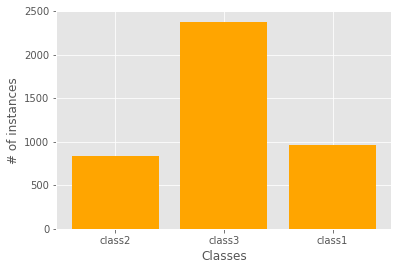

In [11]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
features=[i for i in df if i not in ['Rings','Target']]
df_features=df[features]
X = np.array(df_features.loc[:])
y = df.Target.values

count = {}
for i in y:
    if i not in count:
        count[i] = 1
    else:
        count[i] +=1
l = []
for i in range (3):
    l.append(count[i])
count = l

x = ['class2','class3','class1']

x_pos = [i for i, _ in enumerate(x) ]
plt.bar(x, count, color='orange')
plt.xticks(x_pos, x)
plt.xlabel("Classes")
plt.ylabel("# of instances")

In [12]:
X = df.iloc[:,0:9]
print(X.head(5))
y = df.iloc[:,-1]
print(len(y))

   Sex_F  Sex_I  Sex_M  Diameter  Height  Whole weight  Shucked weight  \
0      0      0      1     0.365   0.095        0.5140          0.2245   
1      0      0      1     0.265   0.090        0.2255          0.0995   
2      1      0      0     0.420   0.135        0.6770          0.2565   
3      0      0      1     0.365   0.125        0.5160          0.2155   
4      0      1      0     0.255   0.080        0.2050          0.0895   

   Viscera weight  Shell weight  
0          0.1010         0.150  
1          0.0485         0.070  
2          0.1415         0.210  
3          0.1140         0.155  
4          0.0395         0.055  
4175


In [13]:
from sklearn.preprocessing import StandardScaler
columns = ['Sex_F','Sex_I','Sex_M','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']
data = X[columns]
print(data.head(5))

   Sex_F  Sex_I  Sex_M  Diameter  Height  Whole weight  Shucked weight  \
0      0      0      1     0.365   0.095        0.5140          0.2245   
1      0      0      1     0.265   0.090        0.2255          0.0995   
2      1      0      0     0.420   0.135        0.6770          0.2565   
3      0      0      1     0.365   0.125        0.5160          0.2155   
4      0      1      0     0.255   0.080        0.2050          0.0895   

   Viscera weight  Shell weight  
0          0.1010         0.150  
1          0.0485         0.070  
2          0.1415         0.210  
3          0.1140         0.155  
4          0.0395         0.055  


In [14]:
scaler = StandardScaler()
scaled_data= scaler.fit_transform(X)
print(scaled_data)
#print(X)

[[-0.67506909 -0.68750501  1.31618002 ... -0.60819984 -0.72680916
  -0.63819465]
 [-0.67506909 -0.68750501  1.31618002 ... -1.17144626 -1.20585737
  -1.21292621]
 [ 1.48132987 -0.68750501 -0.75977449 ... -0.46400875 -0.35725768
  -0.20714599]
 ...
 [-0.67506909 -0.68750501  1.31618002 ...  0.74809757  0.97495258
   0.49690017]
 [ 1.48132987 -0.68750501 -0.75977449 ...  0.77288041  0.73314729
   0.41069044]
 [-0.67506909 -0.68750501  1.31618002 ...  2.64060557  1.78705336
   1.84033518]]


In [15]:
df = pd.DataFrame(data = scaled_data[:,:],columns = columns)
X = df.iloc[:,0:9]

We will not be doing any dimensionality reduction on the dataset as we just have 9 features and we want to get as accurate prediction as possible.<br>We will be using following variables from our dataset for the final classification task:<br>
1.Sex - this is one hot encoded and is represented by three variables now instead of one.<br>
2.Diameter<br>
3.Height<br>
4.Whole weight<br>
5.Shucked weight<br>
6.Viscera weight<br>
7.Shell weight <br>
8.Instead of Rings we will be using Target variable for labelling each of our data instances.

## Evaluation

### Metric Selection

Our classification task includes classifying abalones into different age ranges so that abalone farmers can decide if they have grown fully and are ready to be sold. In this case, it is important the algorithm does not classify young or adult abalones as old because that would make the farmers sell them at higher prices to the customers. But since the abalones won't be fully grown in this case, they won't provide the quantity of meat worth the price paid. If customers do not get worth for the price they are paying, they might feel cheated and thus the farmers would lose those customers in the future.<br>
Thus, we would need high precision, which is lower false positives, for our model which we can calculate from the confusion matrix.

Secondly, if we predict the abalones which are actually old as young or adult, the farmers would sell them for a lower price than their worth. Thus, farmers would suffer losses in such cases. To fix this, we would need high recall so that we have higher true positives and lower false negatives.

Comparing both the cases presented above, recall is of higher significance for our task as the second case directly impacts the profits of the farmers who will be using this prediction algorithm. But we will consider both precision and recall as we want to keep track of false positives and negatives too.

In order to use both precision and recall as a metric, we will use f1-score. F1-score is actually a weighted average of precision and recall. Therefore it takes both False positives and false negatives into account. It is usually only for binary classes whereas we have 3 classes in our dataset. A good solution to this is to aggregate the score over each class. This can be done by doing either f1 micro metric which calculates precision and recall of individual classes and then uses them together to calculate the f1 score or macro-metric which calculates the f1 score of each class and then uses it to get the f1 score of all the classes and evaluate the overall performance of an algorithm. 

$$F1_{micro} = 2\times \frac {PREC_1 \times REC_1 + ... + PREC_n \times REC_n} {PREC_1 + REC_1 +  ... + PREC_n + REC_n} $$

$$F1_{macro} = 2\times \frac {F1_1 + F1_2 + ... F1_n} {n} $$

As seen in the above bar chart, the number of instances in each class is not the same and there is a lot of difference in these numbers. Class 1 alone consists of around 56.9% data instances. If we use accuracy as a metric and our algorithm just predicts class 1 every time, we would still get 56.9% accuracy. Thus, it is clear that using accuracy as a metric for classification is not a good idea for this dataset. We also want to keep track of false positives and false negatives which is not possible by just looking at the accuracy. Thus, we think using the f1 score as a metric is most beneficial in this case.

### Cross Validation Method

Cross-validation is used for the evaluation of the model. For the development of a good machine learning model, it is essential that we have a realistic estimate of how well the model would perform on new data. This is the reason we use cross-validation. There are various methods of dividing our data into training and testing sets, like train test split, k-fold cross-validation, and stratified k-fold cross-validation. Train test split just splits the data randomly into training and testing, k-fold splits the data into k folds and uses one of those folds for testing and the rest for training each time while stratified cross-validation splits the data into k-folds but makes sure that the percentage of data in each class is retained in these folds.

Our dataset has 3 classes which have different number of instances. Class 2 and 3 have more or less similar number of instances so we can say that these two classes are balanced in terms of data, but class 1 has around 2.5 times more instances than the other two classes. Thus we have imbalanced classes in this dataset. In this case, using k-fold cross-validation can be an option but that would split the data into k folds randomly. Thus, it can be quite possible that some of the folds have considerably more data from class 1, some data from class 2 and very few data from class 3 or it can even happen that it does not have any data from one of the classes.

The solution to this is we use stratified cross-validation. Stratified cross-validation ensures that each fold has the same percentage or proportion of the samples of each class as the complete dataset. Thus, our cross-validation will be able to realistically mirror how the algorithm works.
<img src="files/cv.png">

## Modeling

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

y=np.array(y)
y = np.hstack(y)
y = y.astype('int32')
X = np.array(X)

print(X.shape)
print(y.shape)
print(np.min(X),np.max(X))
print(np.unique(y))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4175, 9)
(4175,)
-3.5575778063663615 23.739381284064514
[0 1 2]
(3340, 9)
(3340,)
(835, 9)
(835,)


In [17]:
import numpy as np
from scipy.special import expit
import sys
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin

# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
class TwoLayerPerceptronBase(BaseEstimator, ClassifierMixin ):
    def __init__(self, n_hidden=(30, 50),
                 C=0.0, epochs=500, eta=0.001, random_state=None, phi = 'sigmoid', cost = 'mse'):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        self.n_layers = len(self.n_hidden) # number of layers depends on the lenght of the number of hidden neutrons. 
        self.phi = phi
        self.phi_dict = {'sigmoid':self._sigmoid,
                         'linear':self._linear,
                        'ReLU':self._ReLU,
                        'SiLU':self._SiLU}
        self.cost = cost
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        Weights = []    # this list stores all weights 
        
        
        s, n = self.n_hidden[0], self.n_features_ + 1    # dimension for the first weight
        for i in range (self.n_layers):       # calculate the hidden layer weights, loop stops at the n_layer-1
            W1_num_elems = n*s        # first iteration is a column vector (N+1 by S1)       
            W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems) 
            W1 = W1.reshape(s, n)      # reshape to be W
            Weights.append(W1)
            if i == self.n_layers-1:      # stopping criteria
                break
            s, n = self.n_hidden[i+1], self.n_hidden[i]+1      # uptade for the next weights
            
        
        W2_num_elems = (self.n_hidden[-1] + 1)*self.n_output_ 
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_output_, self.n_hidden[-1] + 1)
        Weights.append(W2)
        
        return Weights
    
            
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    @staticmethod
    def _linear(z):
        return z
    
    @staticmethod
    def _ReLU(z):
        res = np.sign(z)
        res[z <= 0] = 0
        return res*z
    
    @staticmethod
    def _SiLU(z):
        return z*expit(z)

    
    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new
    
    @staticmethod
    def _L2_reg(lambda_, Weights):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        k = 0.
        for i in range (len(Weights)):
            k += np.mean(Weights[i][:, 1:] ** 2)
        return (lambda_/2.0) * np.sqrt(k)
    
    def _cost_fun(self,A3,Y_enc,Weights):
        '''Get the objective function value'''
        if self.cost == 'mse':
            cost_fun = np.mean((Y_enc - A3)**2)
        elif self.cost == 'entropy':
            cost_fun = -np.mean(np.nan_to_num((Y_enc*np.log(A3)+(1-Y_enc)*np.log(1-A3))))
        else:
            raise Exception('No cost function named '+self.cost+' was found!!')
        L2_term = self._L2_reg(self.l2_C, Weights)
        return cost_fun + L2_term
    


In [18]:
class TwoLayerPerceptron(TwoLayerPerceptronBase):
    def _feedforward(self, X, Weights):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs 

        """
        A,Z = [],[]
        temp = X.T
        for i in range (len(Weights)):      # storing values in A
            A1 = self._add_bias_unit(temp, how='row')
            Z1 = Weights[i] @ A1
            A.append(A1)
            Z.append(Z1)
            if i == len(Weights)-1:
                continue
            A_next = self.phi_dict[self.phi](Z1)
            temp = A_next
            
        A.append(self.phi_dict['sigmoid'](Z1))
        
        return A, Z
    
    def _phi_function(self,a):
        if self.phi == 'sigmoid':
            return a*(1-a)
        elif self.phi == 'linear':
            return 1
        elif self.phi == 'ReLU':
            res = np.sign(a)
            res[a <=0 ] = 0
            return res
        elif self.phi == 'SiLU':
            return a + expit(a)*(1-a)
        else:
            raise Exception('No phi function named '+self.phi+' was found!!')
    
    def _get_gradient(self, A, Z, Y_enc, Weights):
        """ Compute gradient step using backpropagation.
        """
        # backpropagation
        grad = [np.zeros(i.shape) for i in Weights] 
        
        # for each instance's activations 
        lis = [x.T for x in A]+[Y_enc.T]    
        
        
        for a in zip(*lis):
            #print (a)
            a1,y1 = a[:-1],a[-1]       # first iteration gets output a(L)
            if self.cost == 'mse':
                dJ_dz2 = -2*(y1 - a1[-1])*self._phi_function(a1[-1])       #return derivative of a(L)
            elif self.cost == 'entropy':
                dJ_dz2 = -((((y/a1[-1])* self._phi_function(a1[-1])) + (((1-y)/(1-a1[-1])) * self._phi_function(-a1[-1])))) 
            else:
                raise Exception('No cost function named '+self.cost+' was found!!')
           
            grad[-1] += dJ_dz2[:,np.newaxis]  @ a1[-2][np.newaxis,:]      # Gradient used to update the outlayer weight
            
            
            for i in range (len(Weights)-1):         # calculate hidden layer gradient
                dJ_dz1 = dJ_dz2 @ Weights[-(i+1)] @ np.diag(self._phi_function(a1[-(i+2)]))
                         
                grad[-(i+2)] += dJ_dz1[1:,np.newaxis] @ a1[-(i+3)][np.newaxis,:] 
                
                dJ_dz2 = dJ_dz1[1:,np.newaxis].reshape((Weights[-(i+2)].shape[0]))
        
        # don't incorporate bias term in the z1 gradient 
        # (its added in a2 from another layer)
           
        # regularize weights that are not bias terms
        for i in range (len(grad)):
            grad[i][:, 1:] += (Weights[i][:, 1:] * self.l2_C)

        return grad
    
    def predict(self, X):
        """Predict class labels"""
        all_A, all_Z = self._feedforward(X, self.Weights)
        y_pred = np.argmax(all_A[-1], axis=0)
        return y_pred
    
    
    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data."""
        
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.Weights = self._initialize_weights()

        self.cost_ = []
        self.score_ = []
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
        for i in range(self.epochs):

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            # feedforward all instances
            A, Z = self._feedforward(X_data,self.Weights)
            #print (A[-1][0])
            cost = self._cost_fun(A[-1],Y_enc,self.Weights)
            self.cost_.append(cost)

            # compute gradient via backpropagation
            grad = self._get_gradient(A = A, Z = Z, Y_enc=Y_enc,
                                              Weights=self.Weights)
            
            for i in range (len(self.Weights)):
                self.Weights[i] -= self.eta * grad[i]
            
        return self
    


In [19]:
class TwoLayerPerceptronVectorized(TwoLayerPerceptron):
    # just need a different gradient calculation
    def _get_gradient(self, A, Z, Y_enc, Weights):
        """ Compute gradient step using backpropagation.
        """
        grad = [np.zeros(i.shape) for i in Weights]
        
        # vectorized backpropagation 
        
        if self.cost == 'mse':
                V2 = -2*(Y_enc - A[-1])*self._phi_function(A[-1])
        elif self.cost == 'entropy':
                V2 = (A[-1]-Y_enc)
        else:
                raise Exception('No cost function named '+self.cost+' was found!!')
        
        grad[-1] = V2 @ A[-2].T
        for i in range (self.n_layers):
            V1 = (self._phi_function(A[-(i+2)]))*(Weights[-(i+1)].T @ V2)
            grad[-(i+2)] = V1[1:,:] @ A[-(i+3)].T
            V2 = V1[1:,:]         #update V2
            
        for i in range (len(grad)):
            # regularize weights that are not bias terms
            grad[i][:, 1:] += Weights[i][:, 1:] * self.l2_C

        return grad
    

In [20]:
params = { 'n_hidden':(30,50), 
         'C':0.1, 'epochs':200, 'eta':0.00001,'random_state':1, 'phi' : 'linear'}

In [21]:
%%time
params['epochs'] = 1000
nn = TwoLayerPerceptronVectorized(**params)

nn.fit(X_train, y_train, print_progress=10)
yhat = nn.predict(X_test)
print('Accuracy:',accuracy_score(y_test,yhat))


Epoch: 1000/1000

Accuracy: 0.7161676646706587
Wall time: 9.51 s


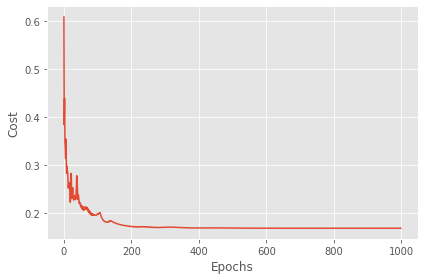

In [22]:
plt.plot(range(len(nn.cost_)), nn.cost_)
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

In [20]:
from sklearn.metrics import accuracy_score
# just start with the vectorized version and minibatch
class TLPMiniBatchBase(TwoLayerPerceptronVectorized):
    def __init__(self, alpha=0.0, decrease_const=0.0, shuffle=True, 
                 minibatches=1, **kwds):        
        # need to add to the original initializer 
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
        # but keep other keywords
        super().__init__(**kwds)
        
    
    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.Weights = self._initialize_weights()
        
        self.grad_W = [] 
        for i in range (len(self.Weights)):
            self.grad_W.append([])
            
        self.weight_W = [] 
        for i in range (len(self.Weights)):
            self.weight_W.append([])

        delta_W_prev = []
        for i in range (len(self.Weights)):
            delta_W_prev.append(np.zeros(self.Weights[i].shape))

        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        for i in range(self.epochs):

            # adaptive learning rate
            self.eta /= (1 + self.decrease_const*i)

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A, Z = self._feedforward(X_data[idx], self.Weights)
                
                cost = self._cost_fun(A[-1],Y_enc[:, idx],self.Weights)
                mini_cost.append(cost)        # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad = self._get_gradient(A = A, Z = Z, Y_enc=Y_enc[:, idx],
                                                  Weights=self.Weights)

                # momentum calculations
                for i in range (len(grad)):
                    delta_w = self.eta * grad[i]
                    self.Weights[i] -= delta_w + self.alpha * delta_W_prev[i]
                    delta_W_prev[i] = delta_w

            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            
            for i in range (len(self.grad_W)):
                self.grad_W[i].append(np.mean(grad[i]))
            for i in range (len(self.weight_W)):
                self.weight_W[i].append(np.mean(self.Weights[i]))
                
        for i in range (len(self.grad_W)):
            self.grad_W[i] = np.array(self.grad_W[i])
        for i in range (len(self.grad_W)):
            self.weight_W[i] = np.array(self.weight_W[i])
            
        return self

In [21]:
class TLPMiniBatch(TLPMiniBatchBase): 
            
    
    def _get_gradient(self, A, Z, Y_enc, Weights):
        """ Compute gradient step using backpropagation.
        """
        grad = [np.zeros(i.shape) for i in Weights]
        
        # vectorized backpropagation
        
        if self.cost == 'mse':
                V2 = -2*(Y_enc - A[-1])*self._phi_function(A[-1])
        elif self.cost == 'entropy':
                V2 = (A[-1]-Y_enc)
        else:
                raise Exception('No cost function named '+self.cost+' was found!!')
        
        grad[-1] = V2 @ A[-2].T
        for i in range (self.n_layers):
            V1 = (self._phi_function(A[-(i+2)]))*(Weights[-(i+1)].T @ V2)
            grad[-(i+2)] = V1[1:,:] @ A[-(i+3)].T
            V2 = V1[1:,:] 
        
        for i in range (len(grad)):
            # regularize weights that are not bias terms
            grad[i][:, 1:] += Weights[i][:, 1:] * self.l2_C

        return grad

In [25]:
params = { 'n_hidden':(30,30), 
         'C':0.1, 'epochs':800, 'eta':0.001, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
         'shuffle':True,'random_state':1, 'phi' : 'sigmoid', 'cost':'entropy'}

nn_quad = TLPMiniBatch(**params)
nn_quad.fit(X_train, y_train, print_progress=1)
yhat = nn_quad.predict(X_test)
print('Test acc:',accuracy_score(y_test,yhat))

Epoch: 800/800

Test acc: 0.7245508982035929


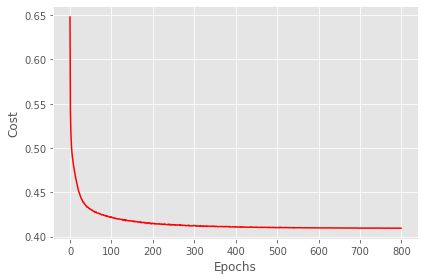

In [26]:
# take the mean of each minibatch epoch
cost_avgs = [np.mean(x) for x in nn_quad.cost_]

plt.plot(range(len(cost_avgs)), cost_avgs, color='red')
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

In [27]:
from scipy.optimize import fmin_bfgs
from scipy.optimize import fmin_l_bfgs_b
class TLPVectorizedBFGS(TwoLayerPerceptronVectorized):
    
    def __init__(self, gtol=1e-5, **kwds):        
        # need to add to the original initializer 
        self.gtol = gtol
        
        # but keep other keywords
        super().__init__(**kwds)
        
    @staticmethod
    def _pack(in1, in2):
        '''Pack and flatten input vectors '''
        return np.hstack((in1.flatten(),in2.flatten()))
    
    def _unpack(self, in_tot):
        '''Undo packing according to layer weight sizes'''
        out1 = in_tot[:self.W1.size].reshape(self.W1.shape)
        out2 = in_tot[self.W1.size:].reshape(self.W2.shape)
        return out1, out2
    
    def _calc_cost_gradient_packed(self,W,X_data,Y_enc):
        '''Unpack and get cost, gradient for bfgs'''
        W1, W2 = self._unpack(W) 
        # feedforward all instances
        A, Z = self._feedforward(X_data,[W1,W2])
        A1, A2, A3 = A
        Z1, Z2 = Z
        
        cost = np.sum((Y_enc-A3)**2)
        L2_term = self._L2_reg(self.l2_C, [W1, W2])
        cost = cost + L2_term
        #perform back prop to get gradients
        grad1,grad2 = self._get_gradient(A=A, Z=Z, Y_enc=Y_enc,
                                         Weights=[W1, W2])
        self.Weights = [W1,W2]
        self.grad = [grad1, grad2]
        return cost, self._pack(grad1,grad2)
    
    def _cost_packed(self,W,X_data,Y_enc):
        '''Unpack and calculate MSE for bfgs'''
        W1, W2 = self._unpack(W)
        _, _, _, _, A3 = self._feedforward(X_data,W1,W2)
        return np.sum((Y_enc-A3)**2)
    
    def fit(self,X,y,print_progress=0):
        '''Learn weights from training data'''
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2 = self._initialize_weights()
        
        # make initial matrices into single row vector
        W = self._pack(self.W1,self.W2)
        
        if print_progress>0:
            def callback(xd):
                callback.counter += 1
                if callback.counter%print_progress==0:
                    sys.stderr.write('\rEpoch: %d/%d (max)' % (callback.counter,callback.epochs))
                    sys.stderr.flush()

            callback.counter = 0
            callback.epochs = self.epochs
            
        else:
            callback = None
            
        # compute gradient optimum with bfgs
        W_best,_,props = fmin_l_bfgs_b(
                        x0=W,
                        func=self._calc_cost_gradient_packed,
                        maxfun=self.epochs,
                        callback=callback,
                        pgtol=self.gtol,
                        args=(X_data, Y_enc))
        
        self.W1, self.W2 = self._unpack(W_best)
        #if print_progress:
        #    print(props)

In [28]:
params = { 'n_hidden':(30,), 
         'C':0.1, 'epochs':200, 'eta':0.001,
         'random_state':1, 'phi' : 'sigmoid', 'cost':'mse'}

nn_bfgs = TLPVectorizedBFGS(**params, gtol=1e-3)

nn_bfgs.fit(X_train, y_train, print_progress=50)
yhat = nn_bfgs.predict(X_test)
print('Accuracy:',accuracy_score(y_test,yhat))

Epoch: 150/200 (max)

Accuracy: 0.7305389221556886


In [48]:
nn_mini = TLPMiniBatch(n_hidden=(50,50), 
                       C=0.001,
                       epochs=600, 
                       eta=0.001,
                       alpha=0.001,
                       decrease_const=0.00001,
                       minibatches=50, 
                       shuffle=True,
                       random_state=1)

nn_mini.fit(X_train, y_train, print_progress=10)
yhat = nn_mini.predict(X_test)
print('Validation acc:',accuracy_score(y_test,yhat))

Epoch: 600/600

Validation acc: 0.7221556886227545


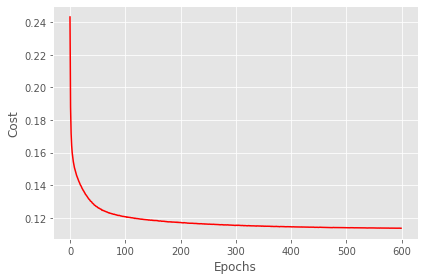

In [49]:
# take the mean of each minibatch epoch
cost_avgs = [np.mean(x) for x in nn_mini.cost_]

plt.plot(range(len(cost_avgs)), cost_avgs, color='red')
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

In [50]:
from sklearn.metrics import accuracy_score,f1_score
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

def print_result(nn,X_train,y_train,X_test,y_test,title="",color="red"):
    
    print("=================")
    print(title,":")
    yhat = nn.predict(X_train)
    print('Resubstitution accuracy:',f1_score(y_train,yhat,average='macro'))
    
    yhat = nn.predict(X_test)
    print('Validation accuracy:',f1_score(y_test,yhat,average='macro'))
    
    if hasattr(nn,'val_score_'):
        plt.plot(range(len(nn.val_score_)), nn.val_score_, color=color,label=title)
        plt.ylabel('Validation Accuracy')
    else:
        plt.plot(range(len(nn.score_)), nn.score_, color=color,label=title)
        plt.ylabel('Resubstitution Accuracy')
        
    plt.xlabel('Epochs')
    plt.tight_layout()
    plt.legend(loc='best')
    plt.grid(True)

In [51]:
vals = { 'n_hidden':(50,), 
         'C':0.001, 'epochs':100, 'eta':0.001, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
         'shuffle':True,'random_state':1,'cost' : 'mse'}

nn_quad = TLPMiniBatch(**vals)

vals = { 'n_hidden':(50,), 
         'C':0.001, 'epochs':100, 'eta':0.001, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
         'shuffle':True,'random_state':1, 'cost':'entropy'}

nn_cross = TLPMiniBatch(**vals)

%time nn_cross.fit(X_train, y_train, print_progress=1)
%time nn_quad.fit(X_train, y_train, print_progress=1)
print("Done")

Epoch: 3/10000

Wall time: 5.5 s


Epoch: 100/100

Wall time: 4.79 s
Done


Cross Entropy Loss :
Resubstitution accuracy: 0.7224565206388656
Validation accuracy: 0.6713659135359115
Quadratic Loss :
Resubstitution accuracy: 0.7089305707567575
Validation accuracy: 0.6601284444181508


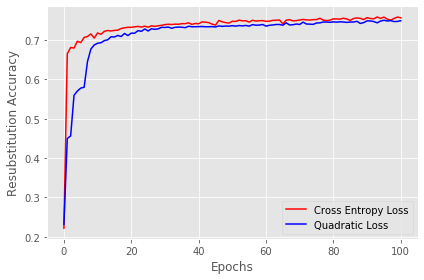

In [52]:
print_result(nn_cross,X_train,y_train,X_test,y_test,title="Cross Entropy Loss",color="red")
print_result(nn_quad,X_train,y_train,X_test,y_test,title="Quadratic Loss",color="blue")

plt.show()

Above plot shows the accuracy for the cross entropy and quadratic cost functions. Cross entropy gives good accuracy of about 70% from 1st epoch and increases to its maximum value in around 25 epochs whereas quadratic cost function gives 47-48% accuracy in 1 epoch and increases to around 66% in 5-6 epochs. It takes 50 epochs for quadratic function to reach around its maximum value.<br> 
Comparing the accuracy of these two functions, cross entropy always has better results. The difference between the accuracy of these two cost functions remains stable after 25 epochs but there is large difference between the accuracies in the first 25 epochs.

## Tuning the Hyper-Parameters

In [23]:
#Tuning
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import GridSearchCV
f1score = make_scorer(f1_score, 
                       pos_label = 1,
                      average = 'macro')

tuned_params = [{'n_hidden':[(50,50),(50,50,50),(50,50,50,50)], 
         'C':[0.1], 'epochs':[600], 'eta':[0.00001],'random_state':[1], 'phi' :['sigmoid','linear'],'cost' :['mse','entropy']}]

nn = TwoLayerPerceptronVectorized()

In [35]:
# GridSearchCV of sklearn does not work. 
# Therefore, in order to search for hyper parameres we used the for loop as presented in the cell below. 
"""search = GridSearchCV(nn, tuned_params ,cv = 10, scoring = f1score)

gs = search.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)"""

'search = GridSearchCV(nn, tuned_params ,cv = 10, scoring = f1score)\n\ngs = search.fit(X_train, y_train)\n\nprint(gs.best_score_)\nprint(gs.best_params_)'

We have tried to implement hyper parameter tuning using Grid Search tuning above. But since it is giving us an error we will perform parameter tuning below in a 'for loop'.

In [54]:
phi = ['sigmoid','linear','ReLU','SiLU']
cost = ['mse','entropy']
n_hidden = [(50,),(50,50),(50,50,50),(50,50,50,50),(50,50,50,50,50),(50,50,50,50,50,50)]

In [55]:
import pandas as pd
Acc = []
F1 = []
output = np.zeros((48,5))

In [56]:
#runs for a long time
l = 0
skf = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

for i in range(len(phi)):
    for j in range(len(cost)):
        for k in range(len(n_hidden)):
            Acc = []
            F1 = []
            for train_index, test_index in skf.split(X, y):
                X_trainval, X_testval = X[train_index], X[test_index]
                y_trainval, y_testval = y[train_index], y[test_index]
                vals = { 'n_hidden':n_hidden[k],'C':0.001, 'epochs':600, 'eta':0.001, 
                     'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
                     'shuffle':True,'random_state':1, 'phi' : phi[i], 'cost':cost[j]}
                nn = TLPMiniBatch(**vals)
                nn.fit(X_trainval, y_trainval, print_progress=1)
                yhat = nn.predict(X_testval)
                acc = accuracy_score(y_testval,yhat)
                Acc.append(acc)
                f1 = f1_score(y_testval,yhat, average='macro')
                F1.append(f1)
            print("Accuracy for model with phi = ",phi[i],"cost function",cost[j],"and with number of hidden layers",len(n_hidden[k]),"is :", np.mean(Acc))
            print("The range of Accuracy for 10 folds is",np.min(Acc),"to",np.max(Acc))
            print("==========")
            print("f1 score is", np.mean(F1))
            print("The range of F1_score for 10 folds is",np.min(F1),"to",np.max(F1))
            if phi[i] == 'sigmoid':
                output[l,0] = 0
            elif phi[i] == 'linear':
                output[l,0] = 1
            elif phi[i] == 'ReLU':
                output[l,0] = 2
            else:
                output[l,0] = 3
            if cost[j] == 'mse':
                output[l,1] = 0
            else:
                output[l,1] = 1
            output[l,2] = len(n_hidden[k])
            output[l,3] = np.mean(Acc)
            output[l,4] = np.mean(F1)
            l += 1

Epoch: 2/60000

Accuracy for model with phi =  sigmoid cost function mse and with number of hidden layers 1 is : 0.7389246497538811
The range of Accuracy for 10 folds is 0.6626794258373205 to 0.8133971291866029
f1 score is 0.6968567922436182
The range of F1_score for 10 folds is 0.5769153593010414 to 0.7946443554888343


Epoch: 2/60000

Accuracy for model with phi =  sigmoid cost function mse and with number of hidden layers 2 is : 0.7398775688687181
The range of Accuracy for 10 folds is 0.6650717703349283 to 0.8205741626794258
f1 score is 0.7013009336900853
The range of F1_score for 10 folds is 0.582234732227576 to 0.8090545220433474


Epoch: 1/60000

Accuracy for model with phi =  sigmoid cost function mse and with number of hidden layers 3 is : 0.7463391883107426
The range of Accuracy for 10 folds is 0.6746411483253588 to 0.8181818181818182
f1 score is 0.7079731293802302
The range of F1_score for 10 folds is 0.5875380657989354 to 0.8054472859964852


Epoch: 2/60000

Accuracy for model with phi =  sigmoid cost function mse and with number of hidden layers 4 is : 0.7456209112577439
The range of Accuracy for 10 folds is 0.6698564593301436 to 0.8157894736842105
f1 score is 0.7092221472313458
The range of F1_score for 10 folds is 0.5891750092276634 to 0.8040482077730965


Epoch: 2/60000

Accuracy for model with phi =  sigmoid cost function mse and with number of hidden layers 5 is : 0.7417891358609837
The range of Accuracy for 10 folds is 0.6746411483253588 to 0.8014354066985646
f1 score is 0.7046517446444522
The range of F1_score for 10 folds is 0.5872809672654434 to 0.7886993772726297


Epoch: 7/60000

Accuracy for model with phi =  sigmoid cost function mse and with number of hidden layers 6 is : 0.7408287530814508
The range of Accuracy for 10 folds is 0.6602870813397129 to 0.7966507177033493
f1 score is 0.7048079494402717
The range of F1_score for 10 folds is 0.5753534864788062 to 0.7858721576563901


Epoch: 4/60000

Accuracy for model with phi =  sigmoid cost function entropy and with number of hidden layers 1 is : 0.7429899087722828
The range of Accuracy for 10 folds is 0.6818181818181818 to 0.8157894736842105
f1 score is 0.703341497905604
The range of F1_score for 10 folds is 0.5978390303212625 to 0.8018358354510574


Epoch: 4/60000

Accuracy for model with phi =  sigmoid cost function entropy and with number of hidden layers 2 is : 0.7429858900880768
The range of Accuracy for 10 folds is 0.6578947368421053 to 0.8038277511961722
f1 score is 0.7061377330241038
The range of F1_score for 10 folds is 0.5749435159702002 to 0.7952880661771459


Epoch: 1/60000

Accuracy for model with phi =  sigmoid cost function entropy and with number of hidden layers 3 is : 0.7396383344189574
The range of Accuracy for 10 folds is 0.6650717703349283 to 0.7894736842105263
f1 score is 0.7020685599460093
The range of F1_score for 10 folds is 0.5790170613700026 to 0.7776610644257703


Epoch: 3/60000

Accuracy for model with phi =  sigmoid cost function entropy and with number of hidden layers 4 is : 0.740831629874606
The range of Accuracy for 10 folds is 0.6578947368421053 to 0.8086124401913876
f1 score is 0.7068731013471872
The range of F1_score for 10 folds is 0.5790471244443364 to 0.7858239460498059


Epoch: 2/60000

Accuracy for model with phi =  sigmoid cost function entropy and with number of hidden layers 5 is : 0.7413072219809724
The range of Accuracy for 10 folds is 0.6650717703349283 to 0.8038277511961722
f1 score is 0.705705714386903
The range of F1_score for 10 folds is 0.5720043093816953 to 0.7888733143496344


Epoch: 10/6000

Accuracy for model with phi =  sigmoid cost function entropy and with number of hidden layers 6 is : 0.7381897049530048
The range of Accuracy for 10 folds is 0.6650717703349283 to 0.8086124401913876
f1 score is 0.7025372698416819
The range of F1_score for 10 folds is 0.580349151677881 to 0.7834201436106709


Epoch: 7/60000

Accuracy for model with phi =  linear cost function mse and with number of hidden layers 1 is : 0.7293357189478449
The range of Accuracy for 10 folds is 0.6770334928229665 to 0.7799043062200957
f1 score is 0.680274664153101
The range of F1_score for 10 folds is 0.5862901572191372 to 0.7600329161022802


Epoch: 4/60000

Accuracy for model with phi =  linear cost function mse and with number of hidden layers 2 is : 0.5693414333678437
The range of Accuracy for 10 folds is 0.5683453237410072 to 0.5697115384615384
f1 score is 0.24186000124960438
The range of F1_score for 10 folds is 0.2415902140672783 to 0.2419601837672282


Epoch: 5/60000

Accuracy for model with phi =  linear cost function mse and with number of hidden layers 3 is : 0.5693414333678437
The range of Accuracy for 10 folds is 0.5683453237410072 to 0.5697115384615384
f1 score is 0.24186000124960438
The range of F1_score for 10 folds is 0.2415902140672783 to 0.2419601837672282


Epoch: 4/60000

Accuracy for model with phi =  linear cost function mse and with number of hidden layers 4 is : 0.5693414333678437
The range of Accuracy for 10 folds is 0.5683453237410072 to 0.5697115384615384
f1 score is 0.24186000124960438
The range of F1_score for 10 folds is 0.2415902140672783 to 0.2419601837672282


Epoch: 3/60000

Accuracy for model with phi =  linear cost function mse and with number of hidden layers 5 is : 0.5693414333678437
The range of Accuracy for 10 folds is 0.5683453237410072 to 0.5697115384615384
f1 score is 0.24186000124960438
The range of F1_score for 10 folds is 0.2415902140672783 to 0.2419601837672282


Epoch: 8/60000

Accuracy for model with phi =  linear cost function mse and with number of hidden layers 6 is : 0.5693414333678437
The range of Accuracy for 10 folds is 0.5683453237410072 to 0.5697115384615384
f1 score is 0.24186000124960438
The range of F1_score for 10 folds is 0.2415902140672783 to 0.2419601837672282


Epoch: 6/60000

Accuracy for model with phi =  linear cost function entropy and with number of hidden layers 1 is : 0.7288555261789832
The range of Accuracy for 10 folds is 0.6770334928229665 to 0.7799043062200957
f1 score is 0.6800650870637546
The range of F1_score for 10 folds is 0.5862901572191372 to 0.7600329161022802


Epoch: 5/60000

Accuracy for model with phi =  linear cost function entropy and with number of hidden layers 2 is : 0.729817638344238
The range of Accuracy for 10 folds is 0.6746411483253588 to 0.7799043062200957
f1 score is 0.681310684283185
The range of F1_score for 10 folds is 0.5856271384347514 to 0.7617405936316765


Epoch: 2/60000

Accuracy for model with phi =  linear cost function entropy and with number of hidden layers 3 is : 0.5693414333678437
The range of Accuracy for 10 folds is 0.5683453237410072 to 0.5697115384615384
f1 score is 0.24186000124960438
The range of F1_score for 10 folds is 0.2415902140672783 to 0.2419601837672282


Epoch: 2/60000

Accuracy for model with phi =  linear cost function entropy and with number of hidden layers 4 is : 0.5693414333678437
The range of Accuracy for 10 folds is 0.5683453237410072 to 0.5697115384615384
f1 score is 0.24186000124960438
The range of F1_score for 10 folds is 0.2415902140672783 to 0.2419601837672282


Epoch: 2/60000

Accuracy for model with phi =  linear cost function entropy and with number of hidden layers 5 is : 0.5693414333678437
The range of Accuracy for 10 folds is 0.5683453237410072 to 0.5697115384615384
f1 score is 0.24186000124960438
The range of F1_score for 10 folds is 0.2415902140672783 to 0.2419601837672282


Epoch: 3/60000

Accuracy for model with phi =  linear cost function entropy and with number of hidden layers 6 is : 0.5693414333678437
The range of Accuracy for 10 folds is 0.5683453237410072 to 0.5697115384615384
f1 score is 0.24186000124960438
The range of F1_score for 10 folds is 0.2415902140672783 to 0.2419601837672282


Epoch: 2/60000

Accuracy for model with phi =  ReLU cost function mse and with number of hidden layers 1 is : 0.7343751710078386
The range of Accuracy for 10 folds is 0.6698564593301436 to 0.7870813397129187
f1 score is 0.7009047188353894
The range of F1_score for 10 folds is 0.598182465238059 to 0.764402003659198


Epoch: 4/60000

Accuracy for model with phi =  ReLU cost function mse and with number of hidden layers 2 is : 0.7106806227818628
The range of Accuracy for 10 folds is 0.65311004784689 to 0.7679425837320574
f1 score is 0.6823144088925669
The range of F1_score for 10 folds is 0.6057042910710145 to 0.7449324047025971


Epoch: 3/60000

Accuracy for model with phi =  ReLU cost function mse and with number of hidden layers 3 is : 0.6979833873056137
The range of Accuracy for 10 folds is 0.569377990430622 to 0.777511961722488
f1 score is 0.6321215224258847
The range of F1_score for 10 folds is 0.24186991869918698 to 0.7458368640153514


Epoch: 3/60000

Accuracy for model with phi =  ReLU cost function mse and with number of hidden layers 4 is : 0.5693414333678437
The range of Accuracy for 10 folds is 0.5683453237410072 to 0.5697115384615384
f1 score is 0.24186000124960438
The range of F1_score for 10 folds is 0.2415902140672783 to 0.2419601837672282


Epoch: 2/60000

Accuracy for model with phi =  ReLU cost function mse and with number of hidden layers 5 is : 0.5693414333678437
The range of Accuracy for 10 folds is 0.5683453237410072 to 0.5697115384615384
f1 score is 0.24186000124960438
The range of F1_score for 10 folds is 0.2415902140672783 to 0.2419601837672282


Epoch: 6/60000

Accuracy for model with phi =  ReLU cost function mse and with number of hidden layers 6 is : 0.5693414333678437
The range of Accuracy for 10 folds is 0.5683453237410072 to 0.5697115384615384
f1 score is 0.24186000124960438
The range of F1_score for 10 folds is 0.2415902140672783 to 0.2419601837672282


Epoch: 5/60000

Accuracy for model with phi =  ReLU cost function entropy and with number of hidden layers 1 is : 0.7353298167502067
The range of Accuracy for 10 folds is 0.6626794258373205 to 0.7894736842105263
f1 score is 0.6991838503328102
The range of F1_score for 10 folds is 0.5895588266858985 to 0.7645043389184195


Epoch: 3/60000

Accuracy for model with phi =  ReLU cost function entropy and with number of hidden layers 2 is : 0.7106645232213198
The range of Accuracy for 10 folds is 0.6483253588516746 to 0.7703349282296651
f1 score is 0.6799440882702592
The range of F1_score for 10 folds is 0.602190561759295 to 0.7472217910464923


Epoch: 3/60000

Accuracy for model with phi =  ReLU cost function entropy and with number of hidden layers 3 is : 0.7020262305062096
The range of Accuracy for 10 folds is 0.6282973621103117 to 0.7559808612440191
f1 score is 0.6720607767631235
The range of F1_score for 10 folds is 0.5760835151670731 to 0.7302637884125378


Epoch: 2/60000

Accuracy for model with phi =  ReLU cost function entropy and with number of hidden layers 4 is : 0.5693414333678437
The range of Accuracy for 10 folds is 0.5683453237410072 to 0.5697115384615384
f1 score is 0.24186000124960438
The range of F1_score for 10 folds is 0.2415902140672783 to 0.2419601837672282


Epoch: 2/60000

Accuracy for model with phi =  ReLU cost function entropy and with number of hidden layers 5 is : 0.5693414333678437
The range of Accuracy for 10 folds is 0.5683453237410072 to 0.5697115384615384
f1 score is 0.24186000124960438
The range of F1_score for 10 folds is 0.2415902140672783 to 0.2419601837672282


Epoch: 6/60000

Accuracy for model with phi =  ReLU cost function entropy and with number of hidden layers 6 is : 0.5693414333678437
The range of Accuracy for 10 folds is 0.5683453237410072 to 0.5697115384615384
f1 score is 0.24186000124960438
The range of F1_score for 10 folds is 0.2415902140672783 to 0.2419601837672282


Epoch: 4/60000

Accuracy for model with phi =  SiLU cost function mse and with number of hidden layers 1 is : 0.7384369878039416
The range of Accuracy for 10 folds is 0.6698564593301436 to 0.7966507177033493
f1 score is 0.7019250655085019
The range of F1_score for 10 folds is 0.5866307219881455 to 0.7705845411648381


Epoch: 3/60000

Accuracy for model with phi =  SiLU cost function mse and with number of hidden layers 2 is : 0.697992569323268
The range of Accuracy for 10 folds is 0.569377990430622 to 0.8038277511961722
f1 score is 0.6038770777312197
The range of F1_score for 10 folds is 0.24186991869918698 to 0.7812165903110461


Epoch: 2/60000

Accuracy for model with phi =  SiLU cost function mse and with number of hidden layers 3 is : 0.5693414333678437
The range of Accuracy for 10 folds is 0.5683453237410072 to 0.5697115384615384
f1 score is 0.24186000124960438
The range of F1_score for 10 folds is 0.2415902140672783 to 0.2419601837672282


Epoch: 1/60000

Accuracy for model with phi =  SiLU cost function mse and with number of hidden layers 4 is : 0.5693414333678437
The range of Accuracy for 10 folds is 0.5683453237410072 to 0.5697115384615384
f1 score is 0.24186000124960438
The range of F1_score for 10 folds is 0.2415902140672783 to 0.2419601837672282


Epoch: 2/60000

Accuracy for model with phi =  SiLU cost function mse and with number of hidden layers 5 is : 0.5693414333678437
The range of Accuracy for 10 folds is 0.5683453237410072 to 0.5697115384615384
f1 score is 0.24186000124960438
The range of F1_score for 10 folds is 0.2415902140672783 to 0.2419601837672282


Epoch: 7/60000

Accuracy for model with phi =  SiLU cost function mse and with number of hidden layers 6 is : 0.5693414333678437
The range of Accuracy for 10 folds is 0.5683453237410072 to 0.5697115384615384
f1 score is 0.24186000124960438
The range of F1_score for 10 folds is 0.2415902140672783 to 0.2419601837672282


Epoch: 5/60000

Accuracy for model with phi =  SiLU cost function entropy and with number of hidden layers 1 is : 0.7393979498035728
The range of Accuracy for 10 folds is 0.6722488038277512 to 0.7918660287081339
f1 score is 0.701717162998998
The range of F1_score for 10 folds is 0.5881730187537809 to 0.774894948305353


Epoch: 3/60000

Accuracy for model with phi =  SiLU cost function entropy and with number of hidden layers 2 is : 0.7279008997439517
The range of Accuracy for 10 folds is 0.6650717703349283 to 0.7822966507177034
f1 score is 0.6967079592481631
The range of F1_score for 10 folds is 0.5992649898969602 to 0.7620169086844372


Epoch: 2/60000

Accuracy for model with phi =  SiLU cost function entropy and with number of hidden layers 3 is : 0.5693414333678437
The range of Accuracy for 10 folds is 0.5683453237410072 to 0.5697115384615384
f1 score is 0.24186000124960438
The range of F1_score for 10 folds is 0.2415902140672783 to 0.2419601837672282


Epoch: 2/60000

Accuracy for model with phi =  SiLU cost function entropy and with number of hidden layers 4 is : 0.5693414333678437
The range of Accuracy for 10 folds is 0.5683453237410072 to 0.5697115384615384
f1 score is 0.24186000124960438
The range of F1_score for 10 folds is 0.2415902140672783 to 0.2419601837672282


Epoch: 2/60000

Accuracy for model with phi =  SiLU cost function entropy and with number of hidden layers 5 is : 0.5693414333678437
The range of Accuracy for 10 folds is 0.5683453237410072 to 0.5697115384615384
f1 score is 0.24186000124960438
The range of F1_score for 10 folds is 0.2415902140672783 to 0.2419601837672282


Epoch: 600/600

Accuracy for model with phi =  SiLU cost function entropy and with number of hidden layers 6 is : 0.5693414333678437
The range of Accuracy for 10 folds is 0.5683453237410072 to 0.5697115384615384
f1 score is 0.24186000124960438
The range of F1_score for 10 folds is 0.2415902140672783 to 0.2419601837672282


Above code fragment helps us to perform cross validation to find the optimal parameters for our model. We have first split our training data into 10 folds of train and test data for hyper parameter tuning purpose. This is done using stratified k-fold cross validation object. Then we have calculated the accuracy and f1 score for each of these folds for every parameter. To get the accuracy and f1 score for each parameter we have taken the average of these values over 10 folds.<br>
As seen above, the values of accuracy and f1 score differ over these 10 folds but the range of this difference is just around 15-20%. Thus we think it is reasonable to take their average since the range does not differ a lot.

In [57]:
print(output)

[[0.         0.         1.         0.73892465 0.69685679]
 [0.         0.         2.         0.73987757 0.70130093]
 [0.         0.         3.         0.74633919 0.70797313]
 [0.         0.         4.         0.74562091 0.70922215]
 [0.         0.         5.         0.74178914 0.70465174]
 [0.         0.         6.         0.74082875 0.70480795]
 [0.         1.         1.         0.74298991 0.7033415 ]
 [0.         1.         2.         0.74298589 0.70613773]
 [0.         1.         3.         0.73963833 0.70206856]
 [0.         1.         4.         0.74083163 0.7068731 ]
 [0.         1.         5.         0.74130722 0.70570571]
 [0.         1.         6.         0.7381897  0.70253727]
 [1.         0.         1.         0.72933572 0.68027466]
 [1.         0.         2.         0.56934143 0.24186   ]
 [1.         0.         3.         0.56934143 0.24186   ]
 [1.         0.         4.         0.56934143 0.24186   ]
 [1.         0.         5.         0.56934143 0.24186   ]
 [1.         0

Since parameter searching takes a long time to run, we have saved the output in the file which we can load to visualize the accuracy and f1 score for different parameter combinations

In [58]:
np.save('output_file', output)

In [59]:
output1 = np.load('output_file.npy')
print(output1)

[[0.         0.         1.         0.73892465 0.69685679]
 [0.         0.         2.         0.73987757 0.70130093]
 [0.         0.         3.         0.74633919 0.70797313]
 [0.         0.         4.         0.74562091 0.70922215]
 [0.         0.         5.         0.74178914 0.70465174]
 [0.         0.         6.         0.74082875 0.70480795]
 [0.         1.         1.         0.74298991 0.7033415 ]
 [0.         1.         2.         0.74298589 0.70613773]
 [0.         1.         3.         0.73963833 0.70206856]
 [0.         1.         4.         0.74083163 0.7068731 ]
 [0.         1.         5.         0.74130722 0.70570571]
 [0.         1.         6.         0.7381897  0.70253727]
 [1.         0.         1.         0.72933572 0.68027466]
 [1.         0.         2.         0.56934143 0.24186   ]
 [1.         0.         3.         0.56934143 0.24186   ]
 [1.         0.         4.         0.56934143 0.24186   ]
 [1.         0.         5.         0.56934143 0.24186   ]
 [1.         0

In [60]:
df = pd.DataFrame(output1)
df.columns = ['phi_func','cost_func','n_Hidden','Accuracy','F1_score']
x = [1,2,3,4,5,6]
legends = ['sigmoid-mse','sigmoid-entropy','linear-mse','linear-entropy','ReLU-mse','ReLU-entropy','SiLU-mse','SiLU-entropy']

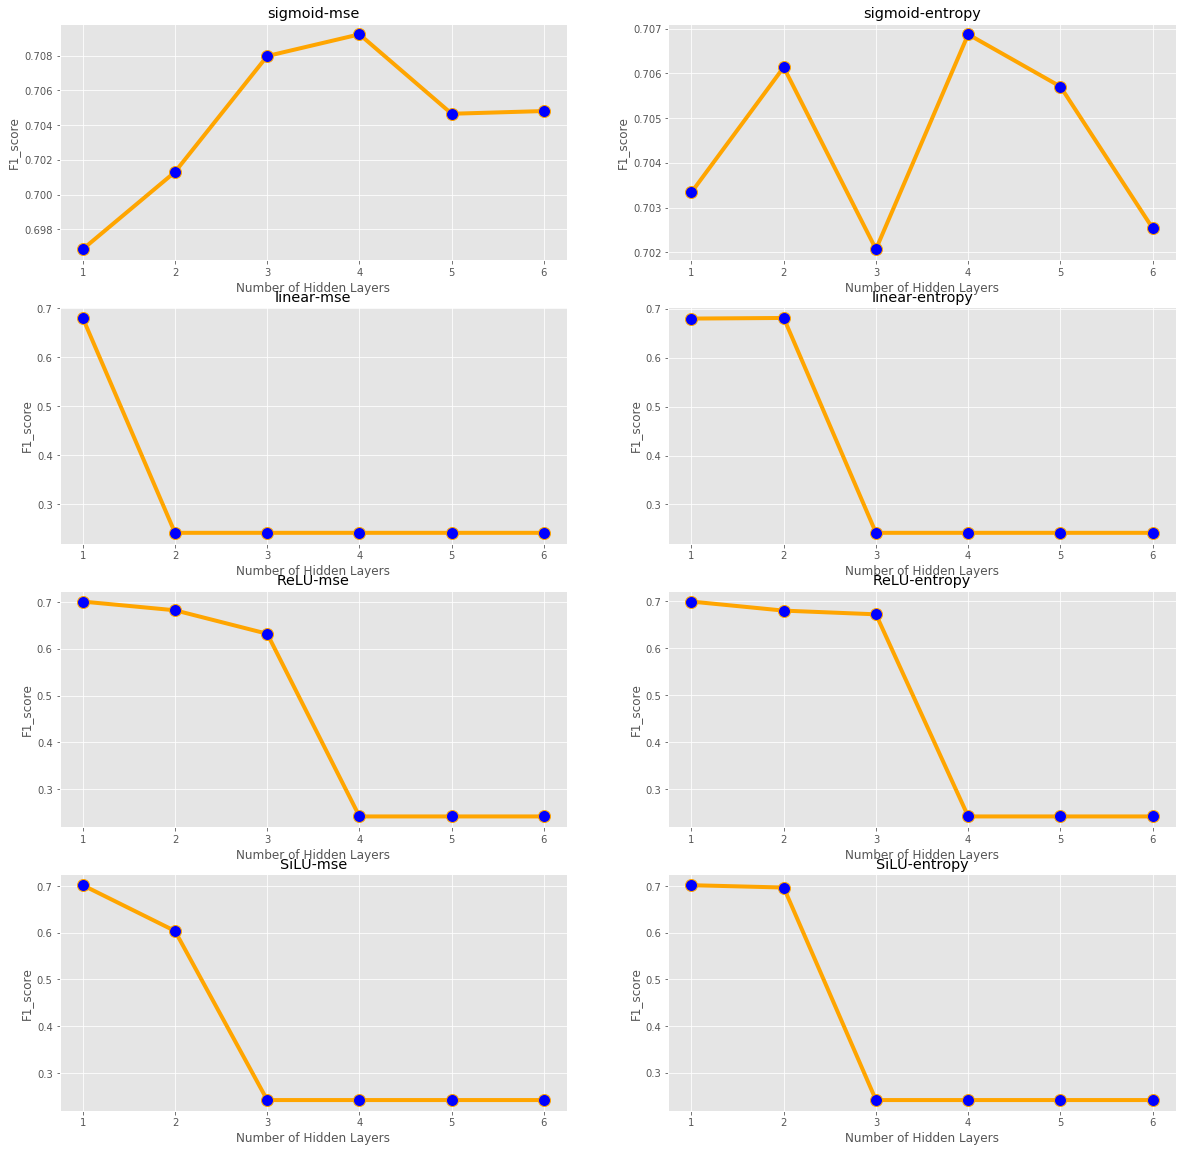

<Figure size 1440x1440 with 0 Axes>

In [61]:
fig, ax = plt.subplots(4,2,figsize=(20,20))
plt.figure(figsize=(20,20))
ax[0,0].plot(x,df['F1_score'][:6],marker='o', markerfacecolor='blue', markersize=12, color='orange', linewidth=4)
ax[0,0].set_title(legends[0])
ax[0,1].plot(x,df['F1_score'][6:12],marker='o', markerfacecolor='blue', markersize=12, color='orange', linewidth=4)
ax[0,1].set_title(legends[1])
ax[1,0].plot(x,df['F1_score'][12:18],marker='o', markerfacecolor='blue', markersize=12, color='orange', linewidth=4)
ax[1,0].set_title(legends[2])
ax[1,1].plot(x,df['F1_score'][18:24],marker='o', markerfacecolor='blue', markersize=12, color='orange', linewidth=4)
ax[1,1].set_title(legends[3])
ax[2,0].plot(x,df['F1_score'][24:30],marker='o', markerfacecolor='blue', markersize=12, color='orange', linewidth=4)
ax[2,0].set_title(legends[4])
ax[2,1].plot(x,df['F1_score'][30:36],marker='o', markerfacecolor='blue', markersize=12, color='orange', linewidth=4)
ax[2,1].set_title(legends[5])
ax[3,0].plot(x,df['F1_score'][36:42],marker='o', markerfacecolor='blue', markersize=12, color='orange', linewidth=4)
ax[3,0].set_title(legends[6])
ax[3,1].plot(x,df['F1_score'][42:48],marker='o', markerfacecolor='blue', markersize=12, color='orange', linewidth=4)
ax[3,1].set_title(legends[7])
for axs in ax.flat:
    axs.set(xlabel= 'Number of Hidden Layers',ylabel= 'F1_score')
    #axs.set()

Above plots show us the f1 scores of the models with various metrics and number of hidden layers. Model with sigmoid as activation function and mse as cost function is giving us the lowest f1 score for the 1st layer among all other models.But Sigmoid activation function is consistently giving us good results with f1 score of around 0.7 for all the hidden layers. 
For overall results, we are getting good performance for 1 to 2 hidden layers with the exception of sigmoid activation function which is working well for all the layers. But as we increase the number of layers in our model, the f1 score deteriorates for other activation functions.<br>
Also, using cross entropy cost function is slightly better than mse cost function generally. The activation function which is giving us good performance consistently is sigmoid. As seen above, sigmoid gives us f1 score of around 71% for 3-4 hidden layers for mse cost function. cross entropy also, is giving us similar results which are in the range of 70-71%.<br>
So, considering all the above things, we have concluded that the optimal parameters for our model would be Sigmoid activation function with quadratic cost function and 4 hidden layers.

We have even plot the accuracy results for the above hyper parameter tuning process.

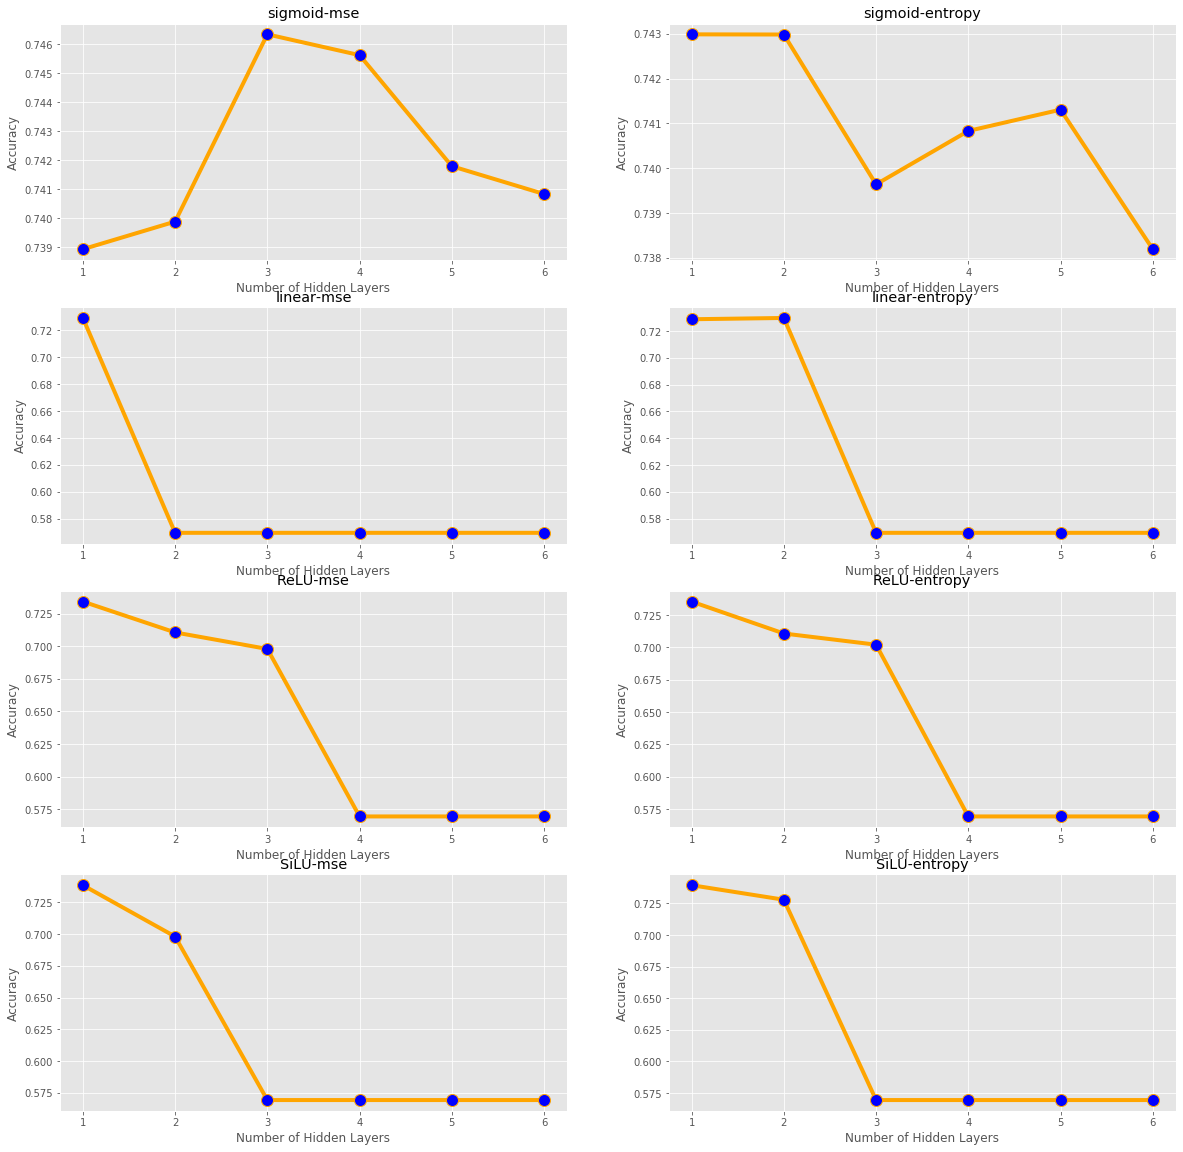

<Figure size 1440x1440 with 0 Axes>

In [62]:
fig, ax = plt.subplots(4,2,figsize=(20,20))
plt.figure(figsize=(20,20))
ax[0,0].plot(x,df['Accuracy'][:6],marker='o', markerfacecolor='blue', markersize=12, color='orange', linewidth=4)
ax[0,0].set_title(legends[0])
ax[0,1].plot(x,df['Accuracy'][6:12],marker='o', markerfacecolor='blue', markersize=12, color='orange', linewidth=4)
ax[0,1].set_title(legends[1])
ax[1,0].plot(x,df['Accuracy'][12:18],marker='o', markerfacecolor='blue', markersize=12, color='orange', linewidth=4)
ax[1,0].set_title(legends[2])
ax[1,1].plot(x,df['Accuracy'][18:24],marker='o', markerfacecolor='blue', markersize=12, color='orange', linewidth=4)
ax[1,1].set_title(legends[3])
ax[2,0].plot(x,df['Accuracy'][24:30],marker='o', markerfacecolor='blue', markersize=12, color='orange', linewidth=4)
ax[2,0].set_title(legends[4])
ax[2,1].plot(x,df['Accuracy'][30:36],marker='o', markerfacecolor='blue', markersize=12, color='orange', linewidth=4)
ax[2,1].set_title(legends[5])
ax[3,0].plot(x,df['Accuracy'][36:42],marker='o', markerfacecolor='blue', markersize=12, color='orange', linewidth=4)
ax[3,0].set_title(legends[6])
ax[3,1].plot(x,df['Accuracy'][42:48],marker='o', markerfacecolor='blue', markersize=12, color='orange', linewidth=4)
ax[3,1].set_title(legends[7])
for axs in ax.flat:
    axs.set(xlabel= 'Number of Hidden Layers',ylabel= 'Accuracy')

As seen above, the change in f1 score is somewhat proportional to the change in accuracy for different models with the given parameters. The accuracy values are slightly higher than f1 score which totally makes sense as f1 is considering false positives and negatives when scoring. But the curves for f1 score and accuracy are similar.

## Visualizing the gradients

Epoch: 600/600

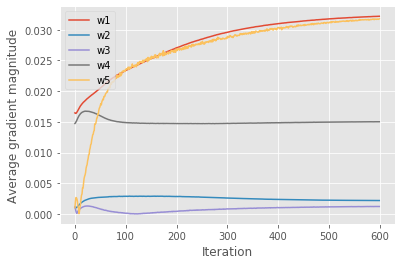

In [65]:
params = {  'n_hidden':(50,50,50,50),'C':0.001, 'epochs':600, 'eta':0.001, 
                     'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
                     'shuffle':True,'random_state':1, 'phi' : 'sigmoid', 'cost':'mse'}

nn_quad = TLPMiniBatch(**params)
nn_quad.fit(X_train, y_train, print_progress=1)

clf = nn_quad
ax = plt.subplot(1,1,1)

for i in range (len(clf.weight_W)):
    plt.plot(abs(clf.weight_W[i]), label='w'+str(i+1))  #visualizing gradient magnitudes
plt.legend()
plt.ylabel('Average gradient magnitude')
plt.xlabel('Iteration')
plt.show()

Epoch: 600/600

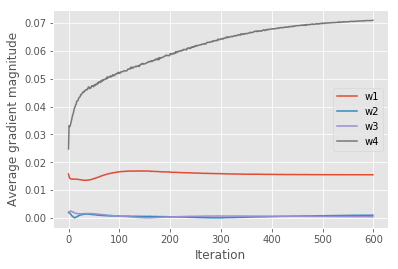

In [24]:
params = {  'n_hidden':(50,50,50),'C':0.001, 'epochs':600, 'eta':0.001, 
                     'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
                     'shuffle':True,'random_state':1, 'phi' : 'sigmoid', 'cost':'mse'}

nn_cross = TLPMiniBatch(**params)
nn_cross.fit(X_train, y_train, print_progress=1)

clf = nn_cross
ax = plt.subplot(1,1,1)

for i in range (len(clf.weight_W)):
    plt.plot(abs(clf.weight_W[i]), label='w'+str(i+1))  #visualizing gradient magnitudes
plt.legend()
plt.ylabel('Average gradient magnitude')
plt.xlabel('Iteration')
plt.show()

We have visualized the gradients for our two best models. The last layer gradients for sigmoid with quadratic cost and 4 hidden layers change considerably upto 200 epochs and this change then somewhat reduces but they keep increasing. They do not stay consistent for any epochs. The gradients of the first layer increase for all 600 epochs and are never consistent. For next 3 layers, they stay consistent after around 100 epochs.<br>
The gradients for sigmoid with quadratic cost and 3 hidden layers are similar to the one with 4 hidden layers. The last layer gradient increases considerably upto 25 epochs and then the increase slows down a little but it keeps increasing for all epochs. The gradients in the first layer increase a little from beginning upto 100 epochs and then stabilizes. Gradients for next two layers are somewhat consistent throughout the training.<br>
The gradients in the last layer have the highest magnitude which then decreases for other layer gradients. This is because the gradients in the final layer are more sensitive to the output and thus have higher magnitude.

## Exceptional Work

We have implemented ReLU and SiLU in the above code and visualized their performance when tuning the hyper-parameters

In [25]:
params = {  'n_hidden':(50,50,50,50),'C':0.001, 'epochs':600, 'eta':0.001, 
                     'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
                     'shuffle':True,'random_state':1, 'phi' : 'sigmoid', 'cost':'mse'}
nn_mini = TLPMiniBatch(**params)
nn_mini.fit(X_train, y_train, print_progress=10)
yhat = nn_mini.predict(X_test)
print('Accuracy:',accuracy_score(y_test,yhat))
print('F1 score:',f1_score(y_test,yhat,average = 'macro'))

Epoch: 600/600

Accuracy: 0.7604790419161677
F1 score: 0.7306097082269168


Finally, we have tested the accuracy of the model, with the selected parameters,on the test data that we had split in the beginning for testing the models. The accuracy we are getting is 76.04% whereas F1 score is 73.06% which is in the same range or even better than the values we were getting in some of the combinations of the parameters. Thus, we can say that we have built a model which is not overfit or would perform well generally.   

# Reference:
Dr. Eric Larson's course at SMU, Fall 2019, https://github.com/eclarson/MachineLearningNotebooks